In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from simulation.models.single_codon import single_codon
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_average_protein(path_pref, chrg_rate, intervals, max_seed):
    df_master = pd.read_csv(f"{path_pref}_{chrg_rate}_1.tsv", sep="\t")
    df_master["seed"] = str(1)
    for i in range(2, max_seed+1):
        tmp = pd.read_csv(f"{path_pref}_{chrg_rate}_{i}.tsv", sep="\t")
        tmp["seed"] = str(i)
        df_master = df_master.append(tmp, ignore_index=True)
    
    df_master["time"] = df_master["time"].apply(np.ceil)
    df_master = df_master.loc[df_master['time'].isin(intervals)].groupby(["time", "species"])["protein"].mean().reset_index()
    df_master["charging_rate"] = chrg_rate
    return df_master

In [4]:
chrg_rates = [50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 10000.0]
intervals = [100.0, 500.0, 1000.0, 2000.0, 3000.0, 4000.0, 5000.0]
path_pref = "../output/phase_analysis/single_codon_100_10_3_250_phase_5000"
df_master = get_average_protein(path_pref, 10.0, intervals, 3)
for rate in chrg_rates:
    tmp = get_average_protein(path_pref, rate, intervals, 3)
    df_master = df_master.append(tmp, ignore_index=True)
df_master

,time,species,protein,charging_rate
0,100.0,TTT_charged,29.000000,10.0
1,100.0,TTT_uncharged,71.000000,10.0
2,100.0,__proteinX_rbs,40.000000,10.0
3,100.0,__ribosome,91.500000,10.0
4,100.0,phi1,1.000000,10.0
...,...,...,...,...
583,5000.0,__proteinX_rbs,1941.666667,10000.0
584,5000.0,__ribosome,35.000000,10000.0
585,5000.0,phi1,1.000000,10000.0
586,5000.0,proteinX,527909.666667,10000.0


<AxesSubplot:xlabel='charging_rate', ylabel='protein'>

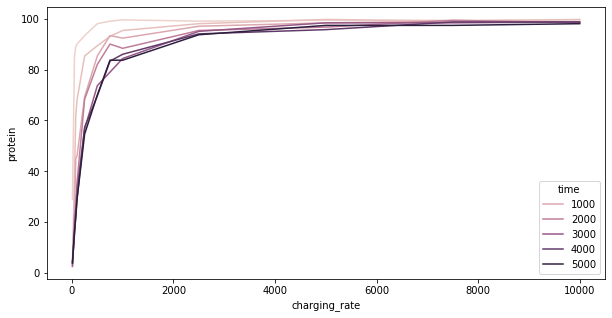

In [5]:
rcParams['figure.figsize'] = [10, 5]
df_fil = df_master[(df_master.species == "TTT_charged")]
sns.lineplot(x="charging_rate", y="protein", hue="time", estimator=None, data=df_fil)

Text(0.5, 0, 'charging rate')

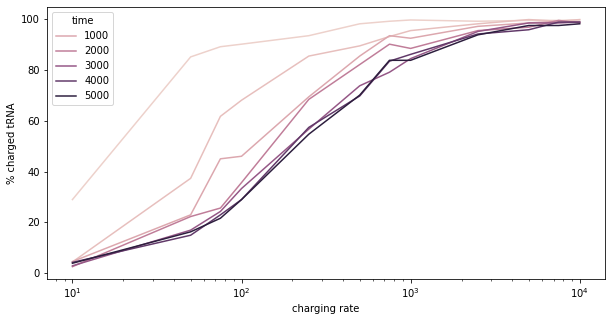

In [7]:
rcParams['figure.figsize'] = [10, 5]
df_fil = df_master[(df_master.species == "TTT_charged")]
sns.lineplot(x="charging_rate", y="protein", hue="time", estimator=None, data=df_fil)
plt.xscale("log")
plt.ylabel("% charged tRNA")
plt.xlabel("charging rate")